<a href="https://colab.research.google.com/github/Nadaramadan1/PythonProject/blob/main/Nada_Ramadan_Classification_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION TASK

✅ Steps to Follow:

1️⃣ Data Cleaning:
- Check nulls, clean data, remove irrelevant columns.

2️⃣ Data Visualization:
- Check distributions, class balance, and feature relationships.

3️⃣ Data Preparation:
- Split data into features and target.
- Train-test split (e.g., 80%-20%).
- Apply scaling if needed (KNN, SVM).

4️⃣ Modeling:
- Logistic Regression → For binary, multi-class, or ordinal.
- KNN → Choose K, distance-based, needs scaling.
- SVM → Choose needs scaling.

5️⃣ Evaluation:
- Use accuracy, confusion matrix, and classification report.
- Check for overfitting or underfitting.

6️⃣ Tuning:
- Handle imbalance if needed.

🚀 Goal: Build, evaluate, and compare classification models.

=====================================================================


# **Data Cleaning **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Telco customer - Telco customer.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.drop(['customerID'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.shape

(7043, 20)

In [ ]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
data.duplicated().sum()

np.int64(22)

In [ ]:
data.drop_duplicates(inplace=True)

# data visualizing

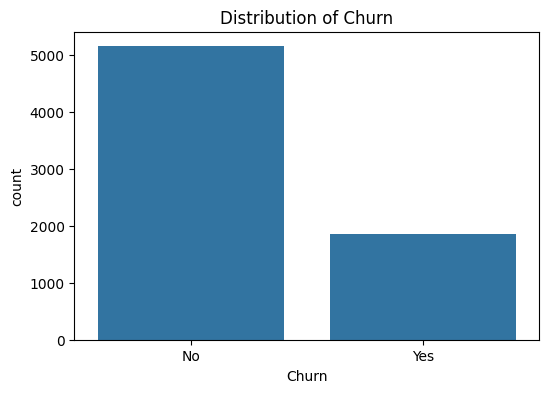

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

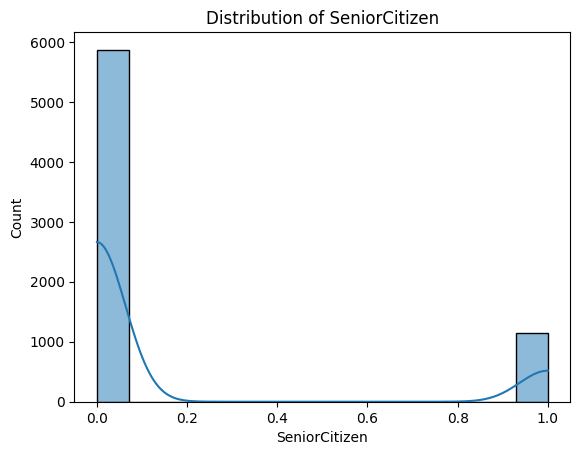

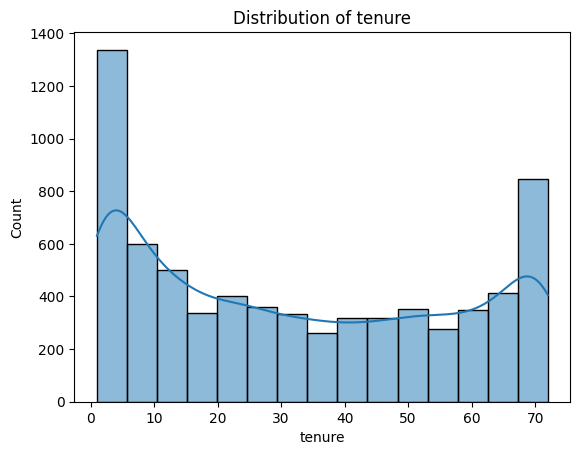

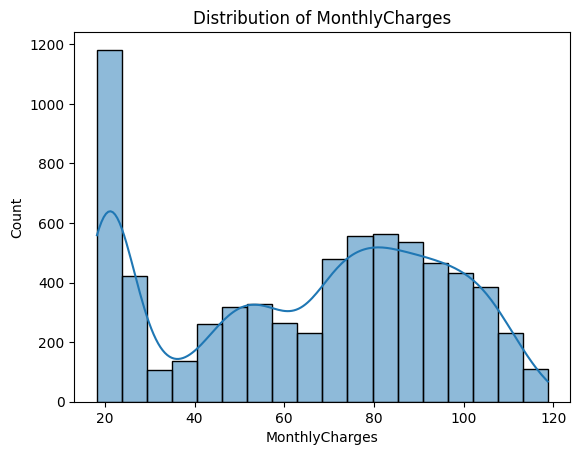

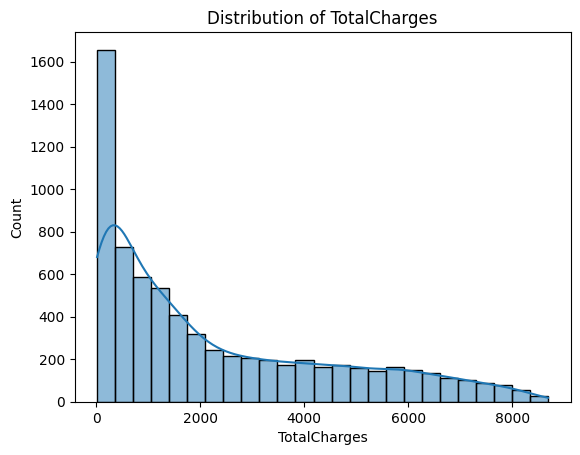

In [ ]:
# Histograms for each numeric
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

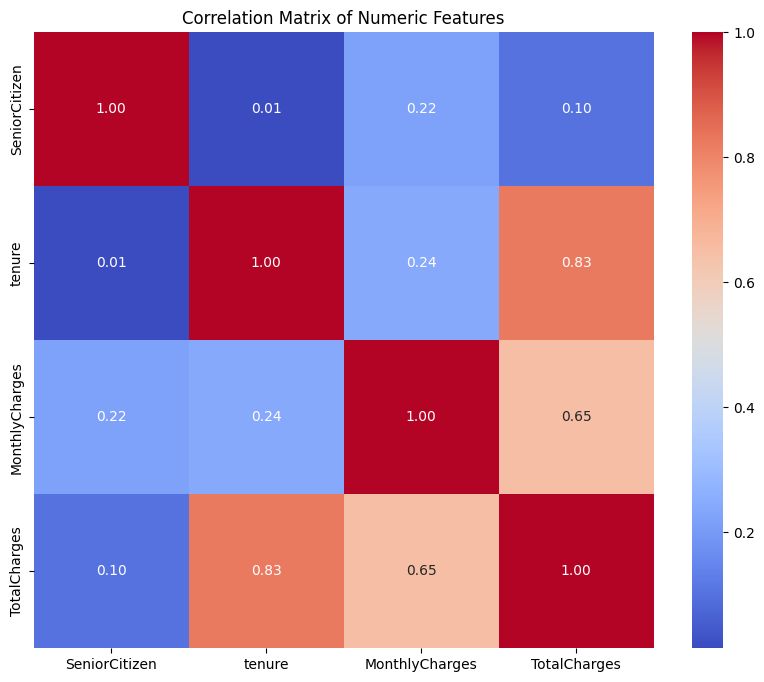

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Data preparing

In [ ]:
# Define X and y AFTER one-hot encoding is applied to data
X = data.drop(['Churn_Yes', 'Churn'], axis=1, errors='ignore') # Drop the encoded Churn_Yes and original Churn (if exists)
y = data['Churn_Yes'] # Use the encoded Churn_Yes column as target

In [ ]:
from sklearn.model_selection import train_test_split

# X and y are defined before this cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5608, 37)
X_test shape: (1402, 37)
y_train shape: (5608,)
y_test shape: (1402,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns after one-hot encoding (now applied to the whole dataset)
# Exclude the target variable if it was included in the initial X before splitting
# Ensure 'SeniorCitizen' is treated as numerical for scaling
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
if 'SeniorCitizen' in X_train.columns and 'SeniorCitizen' not in numerical_cols:
    numerical_cols.append('SeniorCitizen')
numerical_cols = [col for col in numerical_cols if col in X_train.columns] # Final check for column existence


# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns in training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train after scaling:")
display(X_train.head())
print("\nX_test after scaling:")
display(X_test.head())

X_train after scaling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgMonthlyCharge,ServiceCount,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_13–24,TenureGroup_25–36,TenureGroup_37–48,TenureGroup_49–60,TenureGroup_60+
1328,-0.447022,-0.379184,-0.359136,-0.466505,-0.276038,-0.177977,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
5716,-0.447022,-1.236548,-0.324122,-0.958560,-0.759135,-0.662959,True,False,True,True,...,False,True,False,True,False,False,False,False,False,False
1906,-0.447022,0.314872,-0.967714,-0.395166,-0.840984,-0.662959,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
6687,2.237025,-1.236548,0.472865,-0.930175,-0.054953,-0.177977,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1880,-0.447022,-1.236548,0.699623,-0.933447,-0.136120,-0.177977,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False



X_test after scaling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgMonthlyCharge,ServiceCount,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_13–24,TenureGroup_25–36,TenureGroup_37–48,TenureGroup_49–60,TenureGroup_60+
6882,2.237025,1.580504,1.154806,2.168505,1.331131,1.276970,False,False,False,True,...,False,True,True,False,False,False,False,False,False,True
6752,-0.447022,-0.828280,-0.505862,-0.762494,-0.553390,0.307005,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
245,2.237025,-1.154895,0.344480,-0.885718,-0.151586,-0.662959,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1889,-0.447022,-0.746626,-1.131113,-0.821033,-1.030168,-1.147941,True,False,False,False,...,False,True,False,False,True,True,False,False,False,False
6830,-0.447022,0.110738,-1.494593,-0.703999,-1.325296,-1.147941,True,False,False,True,...,True,True,False,False,True,False,True,False,False,False


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg_model = LogisticRegression(random_state=42)


# Train the model on the resampled data
# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set using the retrained model
# Ensure X_test is the correctly prepared test set
y_pred = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after SMOTE: {accuracy:.4f}")

# Generate confusion matrix
# Ensure y_test and y_pred are of compatible types (should be if y_test is numerical)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix after SMOTE:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report after SMOTE:")
print(class_report)

Accuracy after SMOTE: 0.7917

Confusion Matrix after SMOTE:
[[883 198]
 [ 94 227]]

Classification Report after SMOTE:
              precision    recall  f1-score   support

       False       0.90      0.82      0.86      1081
        True       0.53      0.71      0.61       321

    accuracy                           0.79      1402
   macro avg       0.72      0.76      0.73      1402
weighted avg       0.82      0.79      0.80      1402



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model (you can choose a different number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:")
print(conf_matrix_knn)

# Generate classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nKNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 0.7668

KNN Confusion Matrix:
[[906 175]
 [152 169]]

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1081
        True       0.49      0.53      0.51       321

    accuracy                           0.77      1402
   macro avg       0.67      0.68      0.68      1402
weighted avg       0.77      0.77      0.77      1402



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the resampled data
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy after SMOTE: {accuracy_svm:.4f}")

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix after SMOTE:")
print(conf_matrix_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nSVM Classification Report after SMOTE:")
print(class_report_svm)

In [ ]:

print(y_train.value_counts())
print("\nClass distribution in percentage:")
print(y_train.value_counts(normalize=True) * 100)

Churn_Yes
False    4072
True     1536
Name: count, dtype: int64

Class distribution in percentage:
Churn_Yes
False    72.610556
True     27.389444
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
# Ensure X_train and y_train are the correctly prepared ones after the train-test split
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Shape of X_train_resampled: (8144, 37)
Shape of y_train_resampled: (8144,)

Class distribution after SMOTE:
Churn_Yes
False    4072
True     4072
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [200, 500, 1000]
}

# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_resampled, y_train_resampled)

print("Best Logistic Regression Params:", grid_lr.best_params_)

Best Logistic Regression Params: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': list(range(3, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_resampled, y_train_resampled)

print("Best KNN Params:", grid_knn.best_params_)

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_resampled, y_train_resampled)

print("Best SVM Params:", grid_svm.best_params_)

Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Best parameters from GridSearchCV
best_lr = LogisticRegression(
    C=10, # Ensure these parameters are from the GridSearchCV output
    penalty='l2',
    solver='lbfgs',
    max_iter=200,
    random_state=42
)

# Train the model on the resampled data
# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
best_lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = best_lr.predict(X_test) # Ensure X_test is the correctly prepared test set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_knn = KNeighborsClassifier(
    n_neighbors=4, # Ensure these parameters are from the GridSearchCV output
    weights='distance',
    metric='manhattan'
)

# Train the model on the resampled data
# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = best_knn.predict(X_test) # Ensure X_test is the correctly prepared test set

In [ ]:
from sklearn.svm import SVC

best_svm = SVC(
    C=1,            # Ensure these parameters are from the GridSearchCV output
    kernel='rbf',   # Ensure these parameters are from the GridSearchCV output
    gamma='scale',  # Ensure these parameters are from the GridSearchCV output
    random_state=42
)

# Train the model on the resampled data
# Ensure X_train_resampled and y_train_resampled are from the latest SMOTE application
best_svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = best_svm.predict(X_test) # Ensure X_test is the correctly prepared test set

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm
}

# Ensure y_test is the correctly prepared target variable
for name, y_pred in models.items():
    print(f"\n {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression
Accuracy: 0.8002853067047075
Confusion Matrix:
 [[896 185]
 [ 95 226]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.83      0.86      1081
        True       0.55      0.70      0.62       321

    accuracy                           0.80      1402
   macro avg       0.73      0.77      0.74      1402
weighted avg       0.82      0.80      0.81      1402


 KNN
Accuracy: 0.7261055634807418
Confusion Matrix:
 [[799 282]
 [102 219]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.74      0.81      1081
        True       0.44      0.68      0.53       321

    accuracy                           0.73      1402
   macro avg       0.66      0.71      0.67      1402
weighted avg       0.78      0.73      0.74      1402


 SVM
Accuracy: 0.7874465049928673
Confusion Matrix:
 [[879 202]
 [ 96 225]]
Classification Report:
               precision    

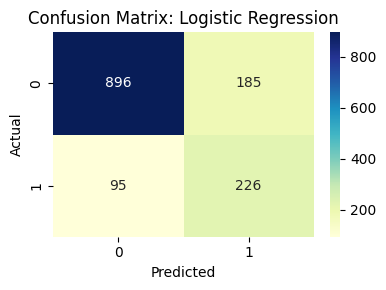

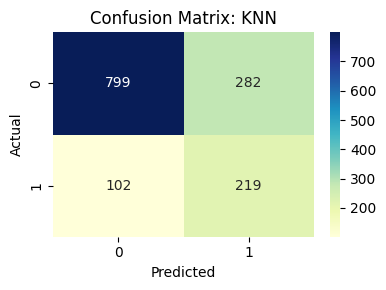

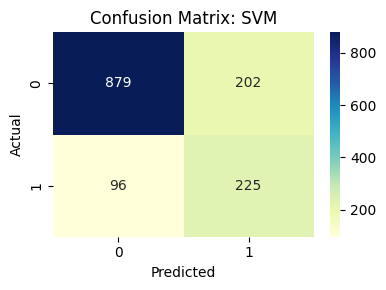

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    # Ensure y_true and y_pred are compatible types
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Ensure y_test and corresponding y_pred are correctly prepared
plot_conf_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_conf_matrix(y_test, y_pred_knn, 'KNN')
plot_conf_matrix(y_test, y_pred_svm, 'SVM')

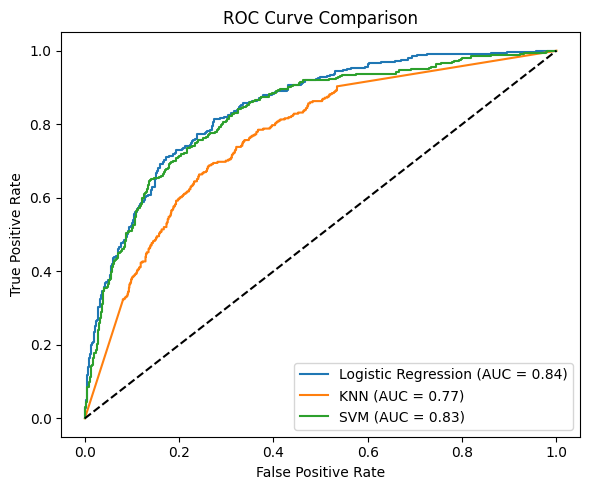

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_roc(y_true, probs, model_name):
    # Convert y_true to numerical labels (0 and 1) if it's not already
    y_true_numeric = np.where(y_true == True, 1, 0) # Assuming y_true is boolean now

    # Ensure probs are the prediction probabilities/decision function outputs from the models trained on correct data
    fpr, tpr, _ = roc_curve(y_true_numeric, probs)
    auc = roc_auc_score(y_true_numeric, probs)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

plt.figure(figsize=(6, 5))

# Logistic Regression - Use predict_proba for probabilities
plot_roc(y_test, best_lr.predict_proba(X_test)[:, 1], "Logistic Regression")

# KNN - Use predict_proba for probabilities
plot_roc(y_test, best_knn.predict_proba(X_test)[:, 1], "KNN")

# SVM (use decision_function for SVC)
plot_roc(y_test, best_svm.decision_function(X_test), "SVM")

plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# REtrain modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lr)

# Generate classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("\nLogistic Regression Classification Report:")
print(class_report_lr)

Logistic Regression Accuracy: 0.8181

Logistic Regression Confusion Matrix:
[[976 105]
 [150 171]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.90      0.88      1081
        True       0.62      0.53      0.57       321

    accuracy                           0.82      1402
   macro avg       0.74      0.72      0.73      1402
weighted avg       0.81      0.82      0.81      1402



In [ ]:
from sklearn.model_selection import train_test_split

# X and y are defined before this cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns after one-hot encoding (now applied to the whole dataset)
# Exclude the target variable if it was included in the initial X before splitting
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns in training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lr)

# Generate classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("\nLogistic Regression Classification Report:")
print(class_report_lr)

Logistic Regression Accuracy: 0.8181

Logistic Regression Confusion Matrix:
[[976 105]
 [150 171]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.90      0.88      1081
        True       0.62      0.53      0.57       321

    accuracy                           0.82      1402
   macro avg       0.74      0.72      0.73      1402
weighted avg       0.81      0.82      0.81      1402



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model (you can choose a different number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:")
print(conf_matrix_knn)

# Generate classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nKNN Classification Report:")
print(class_report_knn)

KNN Accuracy: 0.7668

KNN Confusion Matrix:
[[906 175]
 [152 169]]

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1081
        True       0.49      0.53      0.51       321

    accuracy                           0.77      1402
   macro avg       0.67      0.68      0.68      1402
weighted avg       0.77      0.77      0.77      1402



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nSVM Classification Report:")
print(class_report_svm)

SVM Accuracy: 0.8160

SVM Confusion Matrix:
[[982  99]
 [159 162]]

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1081
        True       0.62      0.50      0.56       321

    accuracy                           0.82      1402
   macro avg       0.74      0.71      0.72      1402
weighted avg       0.81      0.82      0.81      1402



# Feature engineering

In [ ]:
# 📊 1. Tenure Binning: convert tenure into categorical groups
bins = [0, 12, 24, 36, 48, 60, np.inf]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '60+']
data['TenureGroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# 💰 2. Average Monthly Charges (avoid div-by-zero by adding 1 to tenure)
data['AvgMonthlyCharge'] = data['TotalCharges'] / (data['tenure'] + 1)

# 🔢 3. Service Count: count number of 'Yes' responses in service-related columns
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Re-calculate ServiceCount to use the original column names
data['ServiceCount'] = data[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Apply one-hot encoding to the entire data BEFORE splitting
data = pd.get_dummies(data, drop_first=True)